In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline

PREDICTING THE PRICE OF GOLD

In [77]:
#load the dataset
df = pd.read_csv('Gold Futures Historical Data.csv')

In [78]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2024,"2,641.00","2,620.00","2,642.00","2,614.30",86.29K,0.87%
1,12/30/2024,"2,618.10","2,636.10","2,640.70","2,608.40",110.92K,-0.01%
2,12/27/2024,"2,618.40","2,639.70","2,639.70","2,612.10",0.64K,-0.83%
3,12/26/2024,"2,640.30","2,623.30","2,642.40","2,622.80",1.40K,0.67%
4,12/24/2024,"2,622.80","2,616.50","2,622.70","2,612.50",0.42K,0.28%
...,...,...,...,...,...,...,...
2559,01/08/2015,"1,208.50","1,211.00","1,216.80","1,204.20",122.49K,-0.18%
2560,01/07/2015,"1,210.70","1,219.00","1,219.40","1,209.10",117.09K,-0.71%
2561,01/06/2015,"1,219.40","1,204.00","1,223.30","1,201.60",190.36K,1.28%
2562,01/05/2015,"1,204.00","1,187.80","1,207.50","1,177.80",149.11K,1.50%


In [79]:
#Ensure the dates are in ascending order, not descending order
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')

In [80]:
#Count how many empty values exist in our dataset
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        2
Change %    0
dtype: int64

In [81]:
#Remove the empty entries 
df.dropna(inplace=True)

In [82]:
#EDA
df.head
df.info
df.describe
df.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [83]:
#Remove any commas and convert to float
numeric_cols = ['Price', 'Open', 'High', 'Low']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [84]:
#Remove the 'K' string from the dataset
df['Vol.'] = df['Vol.'].str.replace('K', '').astype(float) / 100

In [85]:
#Remove the '%' sign from the dataset
df['Change %'] = df['Change %'].str.replace('%', '').astype(float) / 100

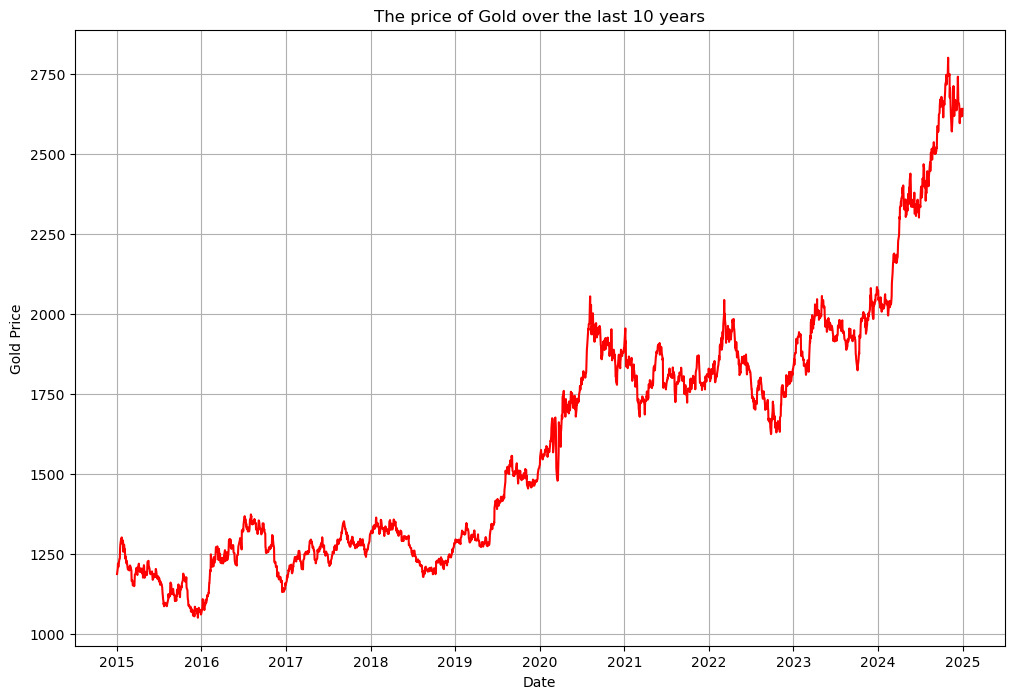

In [86]:
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Price'], label='Gold Futures', color="b")
plt.title("The price of Gold over the last 10 years")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.grid(True)
plt.show()

In [87]:
#Define variables
x = df[['Open', 'High', 'Low', 'Vol.', 'Change %']]
y = df['Price']

In [88]:
#Split our variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
#Create Linear Regression Object
model = LinearRegression()

In [90]:
model.fit(x_train, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(x_test)

In [92]:
y_pred.shape

(513,)

In [93]:
y_test.shape

(513,)

In [94]:
_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [95]:
print(_df)

      Actual    Predicted
405   1965.7  1959.411745
824   1769.9  1774.586986
1389  1507.7  1507.572376
2085  1189.3  1184.534507
1206  1710.6  1707.635173
...      ...          ...
1707  1291.3  1290.740498
894   1809.9  1809.737678
92    2516.1  2519.902430
595   1718.2  1712.964084
2202  1272.7  1272.936143

[513 rows x 2 columns]


In [96]:
#Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [97]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Coefficient of Determination: {r2:.4f}")

Mean Squared Error: 23.29
Mean Absolute Error: 3.36
Coefficient of Determination: 0.9999


In [98]:
#Lets make some Gold price predictions using 2025 data! (Abin)

In [99]:
#The actual values on the 8th of April 2025
future_data = pd.DataFrame({
    "Open": [2995.44],			
    "High": [3037.74],
    "Low": [2993.89],
    "Vol.": [120.19],
    "Change %":[0.98]
})

In [100]:
future_data

,Open,High,Low,Vol.,Change %
0,2995.44,3037.74,2993.89,120.19,0.98


In [101]:
future_predictions = model.predict(future_data)

In [102]:
print(future_predictions)

[3779.37782486]


In [103]:
curr_gold_price = [3024.66]

In [104]:
error = curr_gold_price - future_predictions

In [105]:
error

array([-754.71782486])

In [106]:
#SGD Regressor

In [107]:
#pipeline

In [137]:
maximum_iterations = int(np.ceil(10**6 / x_train.shape[0]))

regressor = make_pipeline(StandardScaler(),
                         linear_model.SGDRegressor(max_iter=maximum_iterations))

regressor.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(loss='huber', max_iter=489))])

In [138]:
_y_pred = regressor.predict(x_test)

In [139]:
_y_pred.shape

(513,)

In [140]:
dataframe = pd.DataFrame({"Actual":y_test, "Predictions":_y_pred})

In [141]:
dataframe

,Actual,Predictions
405,1965.7,42.226801
824,1769.9,42.226905
1389,1507.7,42.226003
2085,1189.3,42.225188
1206,1710.6,42.228034
...,...,...
1707,1291.3,42.221775
894,1809.9,42.221776
92,2516.1,42.226206
595,1718.2,42.225064


In [142]:
mse = mean_squared_error(y_test, _y_pred)
r2 = r2_score(y_test, _y_pred)

In [143]:
print(f"SGD Mean Squared Error: {mse}")
print(f"SGD Coefficient of Determination: {r2}")

SGD Mean Squared Error: 2602974.276985647
SGD Coefficient of Determination: -15.485326414905646
